In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import yfinance as yf
import functions as f


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Prepcocessing

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Bitcoin Price'}, xlabel='Date'>

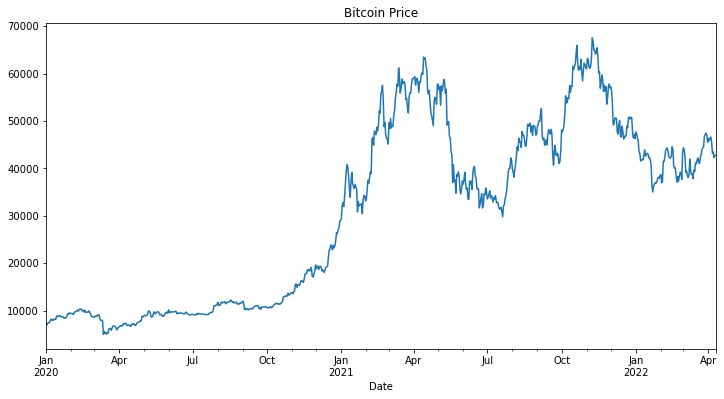

In [32]:
tickerlist = ['BTC-USD']
df = yf.download(tickerlist, period = '1d', start = '2007-01-01',end = pd.Timestamp.today())
columns = tickerlist
df = df.iloc[:,4]['2020':]
df.plot(figsize = (12,6),title = 'Bitcoin Price')

In [33]:
df = pd.DataFrame(df).pct_change().dropna()
df.index = df.index.astype(str)
df['Adj Close'] = df['Adj Close']
df['date'] = df.index

## Import backtest results generated from Model.ipynb

In [34]:
bt = pd.read_csv('backtest_results.csv',index_col = 0)
bt['BTC-USD'] = [1 if x == 1 else -1 for x in bt['BTC-USD']]
bt.index = bt.index.astype(str)
bt_returns = bt[['BTC-USD']]
bt_returns['date'] = bt_returns.index


<ipython-input-34-5baff9c2c944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_returns['date'] = bt_returns.index


## The 'BTC-USD' Column indicates whether we the model predicts if btc is going up or down:
1. -1 => BTC going down => Short
2. 1 => BTC going up => Long
3. Transform the returns by multiplying the returns column by 1 or -1 to get te returns of the model
4. Perfrom df.cumprod() function to get the compounded returns

In [35]:
bt_returns

,BTC-USD,date
2020-12-13,-1,2020-12-13
2020-12-14,1,2020-12-14
2020-12-15,1,2020-12-15
2020-12-16,1,2020-12-16
2020-12-17,1,2020-12-17
...,...,...
2022-03-28,1,2022-03-28
2022-03-29,1,2022-03-29
2022-03-30,-1,2022-03-30
2022-03-31,1,2022-03-31


In [36]:
df = df.merge(bt_returns, on = 'date', how = 'right')

In [37]:
df.set_index('date',inplace = True)

In [38]:
df.head()

,Adj Close,BTC-USD
date,,
2020-12-13,0.018014,-1
2020-12-14,0.005447,1
2020-12-15,0.008855,1
2020-12-16,0.097518,1
2020-12-17,0.070132,1


In [39]:
df['Passive Hold Strategy'] = df['Adj Close']
df['NLP Trading Strategy'] = df['BTC-USD'] * df['Adj Close']
df = df[['Passive Hold Strategy','NLP Trading Strategy']]
df.head()

,Passive Hold Strategy,NLP Trading Strategy
date,,
2020-12-13,0.018014,-0.018014
2020-12-14,0.005447,0.005447
2020-12-15,0.008855,0.008855
2020-12-16,0.097518,0.097518
2020-12-17,0.070132,0.070132


In [41]:
returns = 100*((1+df).cumprod())
returns.head()

,Passive Hold Strategy,NLP Trading Strategy
date,,
2020-12-13,101.801387,98.198613
2020-12-14,102.355862,98.733466
2020-12-15,103.262237,99.607764
2020-12-16,113.332202,109.321350
2020-12-17,121.280467,116.988325


## Backtest results from start of 2021 to now

Text(0, 0.5, 'Compounded Returns (%)')

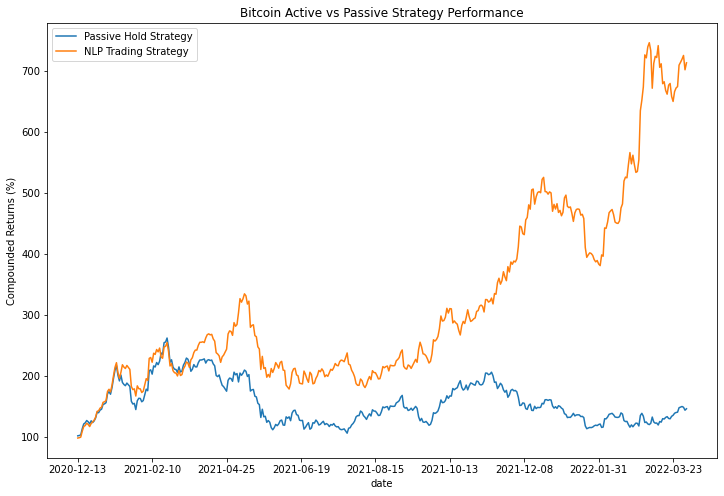

In [44]:
returns.plot(figsize = (12,8), title = 'Bitcoin Active vs Passive Strategy Performance')
plt.ylabel('Compounded Returns (%)')